In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('code-sml_5/datafile/cinema.csv')
df.head()

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227
3,1499,261.0,578,8250.485081,0,9658
4,1164,209.0,683,10908.539550,0,9286


In [4]:
# 欠損値の確認
df.isnull().sum()

cinema_id    0
SNS1         1
SNS2         0
actor        1
original     0
sales        0
dtype: int64

In [5]:
# 平均値で穴埋め
df2 = df.fillna(df.mean())

In [6]:
df2.isnull().sum()

cinema_id    0
SNS1         0
SNS2         0
actor        0
original     0
sales        0
dtype: int64

In [7]:
# 欠損値なし

In [9]:
%matplotlib inline

<AxesSubplot:xlabel='SNS2', ylabel='sales'>

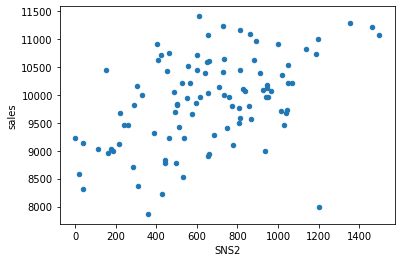

In [10]:
# 散布図
df2.plot(kind='scatter', x='SNS2', y='sales')

In [13]:
# 外れ値の検索
(df2['SNS2'] > 1000) & (df2['sales'] < 8500)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [17]:
# インデックス取得
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index

In [18]:
# 外れ値削除
df3 = df2.drop(no, axis=0)

In [19]:
# 特徴量
x = df3[['SNS1', 'SNS2', 'actor', 'original']]
x

,SNS1,SNS2,actor,original
0,291.0,1044,8808.994029,0
1,363.0,568,10290.709370,1
2,158.0,431,6340.388534,1
3,261.0,578,8250.485081,0
4,209.0,683,10908.539550,0
...,...,...,...,...
95,494.0,1050,11137.482810,1
96,505.0,928,11376.038540,1
97,368.0,966,10393.252480,0
98,326.0,1068,9454.019853,1


In [20]:
# 正解データ
t = df3['sales']
t

0      9731
1     10210
2      8227
3      9658
4      9286
      ...  
95    10537
96    10084
97    10069
98    10218
99    10435
Name: sales, Length: 99, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 学習データと検証データに分割
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 4)
(20, 4)
(79,)
(20,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

In [28]:
model.score(x_test, y_test)

0.7903881596570093

In [29]:
# 予想
new = [[150, 700, 300, 0]]
model.predict(new)

array([6874.109753])

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
pred = model.predict(x_test)
mae = mean_absolute_error(y_pred=pred, y_true=y_test)
mae

277.12236964086253

In [32]:
# 係数
model.coef_

array([  1.07645622,   0.53400191,   0.28473752, 213.95584503])

In [33]:
# 切片
model.intercept_

6253.418729438708